In [1]:
import os 
import ipywidgets as widgets
import matplotlib.pyplot as plt

from IPython.display import clear_output,display, HTML
from source.commonlib import pathlist as pl
from source.commonlib import analise as an
from source.commonlib import metric as mr
from source.commonlib import analisegprof as agp
from source.commonlib import graphics as graphs

from source.models import matrix as mtx

import numpy as np

In [2]:
#CONSTANTS
VVCLOG_DIR =  ""
CONFIG = ''

#arrumar pra poder criar matriz sem parametro
MATRIX = mtx.Matrix('') 


dropdown_global = widgets.Dropdown(options="")

In [3]:
output = widgets.Output()
output2 = widgets.Output()

In [4]:
#FUNCTIONS BUTTON
def on_button_clear_vvc_click(b):
    with output:
        clear_output()

def on_button_vvc_print_click(b):
    with output:

        global VVCLOG_DIR
        global MATRIX
    
        check_tags = []
        if box1.value == True:
            check_tags.append(box1.description)
        if box2.value == True:
            check_tags.append(box2.description)
        if box3.value == True:
            check_tags.append(box3.description)
    
        bd_tags = []
        if box4.value == True:
            bd_tags.append(box4.description)
        if box5.value == True:
            bd_tags.append(box5.description)
        
        color_tags = []
        if box6.value == True:
            color_tags.append(box6.description)
        if box7.value == True:
            color_tags.append(box7.description)
    
        if(VVCLOG_DIR != ''):
            MATRIX = an.analise('vvc', dropdown_global.value, VVCLOG_DIR, CONFIG, check_tags, bd_tags, color_tags)  
        



In [5]:
# widgets VVC 
def analise_vvc_print():
    display(HTML("<h2>VVC</h2>"))
    display(container, container2)
    display(buttons_vvc,output)

def analise_gprof_print():
    display(HTML("<h2>GPROF</h2>"))
    display(text_function)
    display(text_class)
    display(buttons_gprof)

In [6]:
# ELEMENTS 
# Dropdown


# Buttons
botao_vvc = widgets.Button(description='Print')
botao_vvc.on_click(on_button_vvc_print_click)
botao_vvc_clear = widgets.Button(description='Clear')
botao_vvc_clear.on_click(on_button_clear_vvc_click)

#botao_gprof = widgets.Button(description='Print')
#botao_gprof.on_click(on_button_gprof_print_click)
#botao_gprof_clear = widgets.Button(description='Clear')
#botao_gprof_clear.on_click(on_button_clear_gprof_click)

buttons_vvc = widgets.HBox([botao_vvc, botao_vvc_clear])
#buttons_gprof = widgets.HBox([botao_gprof, botao_gprof_clear])


# Selection line1
box1 = widgets.Checkbox(
    description='Time',
    indent=False,
    disabled=False,
    layout=widgets.Layout(width='auto', margin='5px'),
    style={'description_width': 'initial'}
)
box2 = widgets.Checkbox(
    description='Bitrate',
    indent=False,
    disabled=False,
    layout=widgets.Layout(width='auto', margin ='5px'),
    style={'description_width': 'initial'}
)
box3 = widgets.Checkbox(
    description='PSNR',
    indent=False,
    disabled=False,
    layout=widgets.Layout(width='auto', margin='5px'),
    style={'description_width': 'initial'}
)
box4 = widgets.Checkbox(
    description='BD-Rate',
    indent=False,
    disabled=False,
    layout=widgets.Layout(width='auto', margin='5px'),
    style={'description_width': 'initial'}
)
box5 = widgets.Checkbox(
    description='BD-PSNR',
    indent=False,
    disabled=False,
    layout=widgets.Layout(width='auto', margin='5px'),
    style={'description_width': 'initial'}
)


#Selection line 2
box6 = widgets.Checkbox(
    description='Best values',
    indent=False,
    disabled=False,
    layout=widgets.Layout(width='auto', margin='5px'),
    style={'description_width': 'final'}
)
box7 = widgets.Checkbox(
    description='Worst values',
    indent=False,
    disabled=False,
    layout=widgets.Layout(width='auto', margin='5px'),
    style={'description_width': 'final'}
)

#dropdown gprof
#options_drop_gprof = ['1','2','3','4','5','6','7']
#dropdown_gprof = widgets.Dropdown(options=options_drop_gprof)

#FAZER FUNÇÃO E CLASSES SEREM DROPLISTS COM AS FUNÇÕES Q ESTÃO NO LOG
#text box gprof
text_function = widgets.Text(description='Função:', value='')
text_class = widgets.Text(description='Classe:', value='')

container = widgets.HBox([box1, box2, box3, box4, box5])
container2 = widgets.HBox([box6, box7])

In [7]:
#DISPLAY
def display_drop(dir):

    if (dir == ''):
        options_drop = [""]
    else:              
        options_drop = pl.list_matrices("-", dir)
        options_drop.remove("Precise")
        options_drop.sort()

    return widgets.Dropdown(options=options_drop)

In [8]:
def on_click_button_ok(b):
    with output2: 
        global dropdown_global
        global VVCLOG_DIR
        global CONFIG

        clear_output()
        VVCLOG_DIR = path.value + "/vvc_log/"
        CONFIG = toggle_config.value
        
        dropdown_global = display_drop(VVCLOG_DIR)
        display(dropdown_global)

   

In [9]:
display(HTML("<h1>ANALISE</h1>"))

path = widgets.Text(
    placeholder='path',
    disabled=False
)
button_ok = widgets.Button(
    description = 'OK'
)
button_ok.on_click(on_click_button_ok)   

toggle_config = widgets.ToggleButtons(
    options=['AI', 'LB', 'RA'],
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['All Intra', 'Low Delay B', 'Random Access'],
#     icons=['check'] * 3
)

display(path)
display(toggle_config)
display(button_ok, output2)

Text(value='', placeholder='path')

ToggleButtons(options=('AI', 'LB', 'RA'), tooltips=('All Intra', 'Low Delay B', 'Random Access'), value='AI')

Button(description='OK', style=ButtonStyle())

Output()

In [10]:
analise_vvc_print()

Output()

In [13]:
display(HTML("<h2>GRAPHICS</h2>"))
data = graphs.make_dictionary(MATRIX, CONFIG)


ValueError: not enough values to unpack (expected 3, got 2)

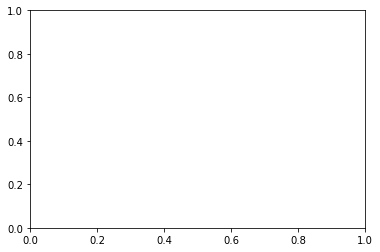

In [16]:
# Cores para os testes
cores = ['-b', '-g', '-r', '-c']
label_l = ['-1','-2','-3','SAD']
# Crie um gráfico de linhas empilhadas com marcadores e linha horizontal em zero
fig, ax = plt.subplots()
for i, teste in enumerate(['1','2','3','sad']):
    ax.plot(data['Name'], data[teste], cores[i], label=teste, marker='o', markersize=5)

# Adicione uma linha horizontal em zero
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Rotacione os nomes dos vídeos verticalmente
plt.xticks(rotation=90)

# Adicione uma legenda de cores
ax.legend(loc='upper left')

# Rótulos dos eixos e título
plt.xlabel('Vídeo')
plt.ylabel('Valor')
plt.title('BD-Rate por Aproximação')

# Exiba o gráfico
plt.show()